In [93]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# We get the splitted data directly from keras datasets
# So, no need to use train_test_split()
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# print(X_train[:5][0])

print("Train:", X_train.shape, y_train.shape)
print("Test: ", X_test.shape, y_test.shape)

# Check for missing values
print("Missing values in training set:", np.isnan(X_train).sum())
print("Missing values in test set:", np.isnan(X_test).sum())

Train: (60000, 28, 28) (60000,)
Test:  (10000, 28, 28) (10000,)
Missing values in training set: 0
Missing values in test set: 0


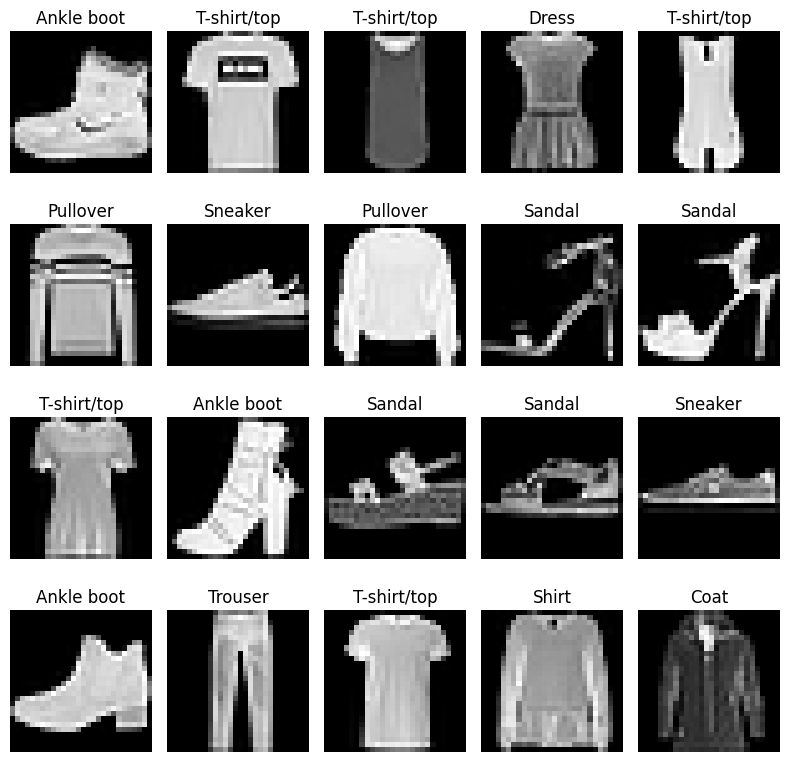

In [94]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Visualize sample images from the dataset
plt.figure(figsize=(8, 8))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.tight_layout()
plt.show()

In [95]:
# Scaling the data in [0, 1] range
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Reshaping the data to 2D arrays
X_train = X_train.reshape(len(X_train), -1) # 60000 x (28*28)
X_test = X_test.reshape(len(X_test), -1) # 10000 x (28*28)

In [ ]:
# Use this for faster training
X_train = X_train[:20000]
y_train = y_train[:20000]

model = LogisticRegression(max_iter=1000, n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

print("Confusion Matrix:")
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sb.heatmap(cm, annot=True, fmt="d", cmap="Blues",
           xticklabels=class_names,
           yticklabels=class_names)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()